In [119]:
#參考文獻
#https://www.jamleecute.com/%E7%B6%B2%E8%B7%AF%E7%88%AC%E8%9F%B2-web-crawler-text-mining-python/
#載入套件
import requests
from bs4 import BeautifulSoup
import pandas as pd
#載入斷詞分析的套件
import jieba
import nltk
#載入文字雲套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#將此頁面的HTML GET下來
r = requests.get("https://news.google.com/topics/CAAqJQgKIh9DQkFTRVFvSUwyMHZNR3QwTlRFU0JYcG9MVlJYS0FBUAE?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant") 
#印出HTML
web_content = r.text
print(web_content)
soup = BeautifulSoup(web_content,'lxml')

<!doctype html><html lang="zh" dir="ltr"><head><base href="https://news.google.com/"><meta name="referrer" content="origin"><link rel="canonical" href="https://news.google.com/topics/CAAqJQgKIh9DQkFTRVFvSUwyMHZNR3QwTlRFU0JYcG9MVlJYS0FBUAE"><meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui"><meta name="google-site-verification" content="AcBy5YFny2HQgVUCR18tO5YUTf6MpVlcJqGTd-a9-SI"><meta name="mobile-web-app-capable" content="yes"><meta name="apple-mobile-web-app-capable" content="yes"><meta name="application-name" content="新聞"><meta name="apple-mobile-web-app-title" content="新聞"><meta name="apple-mobile-web-app-status-bar-style" content="black"><meta name="theme-color" content="white"><meta name="msapplication-tap-highlight" content="no"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-DR60l-K8vnyi99NZovm9HlXyZwQ85GMDxiwJWzoasZYCUrPuUM_P_4Rb7ei03j-0nRs0c4F=w16" sizes="16x16"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-D

In [120]:
#找出div的區塊
title = soup.find_all('h3', class_='ipQwMb ekueJc gEATFF RD0gLb')
print(title)

[<h3 class="ipQwMb ekueJc gEATFF RD0gLb"><a class="DY5T1d" href="./articles/CBMiJWh0dHBzOi8vd3d3LnN0b3JtLm1nL2xpZmVzdHlsZS8xMjE4NDXSASZodHRwczovL3d3dy5zdG9ybS5tZy9hbXBhcnRpY2xlLzEyMTg0NQ?hl=zh-TW&amp;gl=TW&amp;ceid=TW%3Azh-Hant">不實醫美廣告 北市1-4月開罰700萬</a></h3>, <h3 class="ipQwMb ekueJc gEATFF RD0gLb"><a class="DY5T1d" href="./articles/CBMi9gFodHRwczovL3d3dy5oZWFsdGh5ZC5jb20vYXJ0aWNsZXMvYm9keS8lRTYlQjMlOTUlRTUlOUMlOEIlRTUlQTklQTYlRTQlQkElQkElRTglODUlQTYlRTclODIlOEUlRTclOTclODUlRTklODAlOUQtJUU1JTgyJUIzJUU3JUE3JTkxJUU1JUFEJUI4JUU1JUFFJUI2JUU2JTk2JUIwJUU1JTg2JUEwJUU2JUFBJUEyJUU2JUI4JUFDJUU3JTk5JUJDJUU3JThGJUJFJUU1JTg1JUE4JUU2JTk2JUIwJUU3JTk3JTg1JUU2JUFGJTkyP3JlZj1obWHSAQA?hl=zh-TW&amp;gl=TW&amp;ceid=TW%3Azh-Hant">法國婦人腦炎病逝傳科學家新冠檢測發現全新病毒懷疑經蚊蟲傳播- 健康百科</a></h3>, <h3 class="ipQwMb ekueJc gEATFF RD0gLb"><a class="DY5T1d" href="./articles/CBMiJWh0dHBzOi8vd3d3LnN0b3JtLm1nL2xpZmVzdHlsZS8yMTkyMDPSASZodHRwczovL3d3dy5zdG9ybS5tZy9hbXBhcnRpY2xlLzIxOTIwMw?hl=zh-TW&amp;gl=TW&amp;ceid=TW%3Azh-Hant">一餐吃十幾塊蘿蔔糕，

In [121]:
#從區塊找出標題，並全部列出
titles = [t.find('a').text for t in title]
titles

['不實醫美廣告 北市1-4月開罰700萬',
 '法國婦人腦炎病逝傳科學家新冠檢測發現全新病毒懷疑經蚊蟲傳播- 健康百科',
 '一餐吃十幾塊蘿蔔糕，血糖就意外飆高…營養師4大建議，吃東西真的要謹慎啊！',
 '為何專家會說「咳嗽用手遮住嘴巴」是錯誤行為？尋常動作其實危機四伏啊…',
 '你還在用塑膠袋裝熱湯嗎？小心！塑化劑已下肚',
 '有肌腱炎、網球肘，老是這裡痠那裡痛怎麼辦？現在用這種療法，讓你不用再打針吃藥',
 '立院三讀通過 愛滋病患將可器捐其他帶原者',
 '幾乎所有失智症患者都有的8大前兆！醫生說的請記牢，符合2項就得小心了…',
 '曾肆虐美國，今入侵台灣 腸病毒D68型恐形成嚴重呼吸道感染與肢體麻痺',
 '別再相信「小酌有益健康」！營養師闢謠：酒是致癌物，一天千萬別喝超過這個量…',
 '酸痛貼布不是貼越久越快康復！貼太久反害皮膚爛掉，專家：貼這時間已是極限',
 '剛運動完真的不能吃東西嗎？營養師列4大健康組合破迷思，一小時內吃對瘦更快！',
 '家中有血糖高、糖尿病患，年夜飯都吃得戰戰兢兢…醫師澄清：其實「這類」食物不挾就好',
 '一下便祕一下腹瀉，腸道總是鬧不停？醫生：恐怕是這種病，有4種食物千萬別吃',
 '指甲狀態其實暗藏健康密碼？出現這種顏色的指甲，小心是癌症上身',
 '包皮一定要割嗎？會不會影響性能力？醫生建議：這4種情況沒割掉，小心會「害人害己」',
 '日本「德國麻疹」病例創新高！東京、千葉疫情升溫 育齡女性赴日旅遊要注意',
 '中秋節吃柚子文旦 小心藥物交互作用傷身',
 '世界級醫療設備 服務猶勝香港：《樂戶台灣》選摘（1）',
 '天氣熱就想吃西瓜消暑啊！但，有3種人吃西瓜要小心身體有負擔',
 '不是只有吃甜食才會蛀牙，專家傳授3招教你清光牙菌斑',
 '讓毛小孩安心養老！台北市首創犬貓安養機構',
 '呼吸時「咻咻叫」，才叫氣喘嗎？胸腔內科醫師提醒，其實有這症狀就要小心了…',
 '為何一堆台灣女生婚前瘋「處女膜重建」？關於初夜流血這回事，或許我們都誤會了…',
 '大腸癌其實是可以預防的啊！4種常見息肉這種最易病變，別讓「國民惡夢」一再上演',
 '熱水洗頭真的好嗎？3個熱水對頭皮健康的影響，超過這溫度小心掉頭髮呀',
 '肉要烤，健康也要顧好！專家教你中秋烤肉5大密技，不管怎麼吃、就是不會吃到致癌物',


In [122]:
#從區塊找出標題，並全部列出
newUrls = [t.find('a')['href'].replace('.','https://news.google.com',1) for t in title]
newUrls

['https://news.google.com/articles/CBMiJWh0dHBzOi8vd3d3LnN0b3JtLm1nL2xpZmVzdHlsZS8xMjE4NDXSASZodHRwczovL3d3dy5zdG9ybS5tZy9hbXBhcnRpY2xlLzEyMTg0NQ?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant',
 'https://news.google.com/articles/CBMi9gFodHRwczovL3d3dy5oZWFsdGh5ZC5jb20vYXJ0aWNsZXMvYm9keS8lRTYlQjMlOTUlRTUlOUMlOEIlRTUlQTklQTYlRTQlQkElQkElRTglODUlQTYlRTclODIlOEUlRTclOTclODUlRTklODAlOUQtJUU1JTgyJUIzJUU3JUE3JTkxJUU1JUFEJUI4JUU1JUFFJUI2JUU2JTk2JUIwJUU1JTg2JUEwJUU2JUFBJUEyJUU2JUI4JUFDJUU3JTk5JUJDJUU3JThGJUJFJUU1JTg1JUE4JUU2JTk2JUIwJUU3JTk3JTg1JUU2JUFGJTkyP3JlZj1obWHSAQA?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant',
 'https://news.google.com/articles/CBMiJWh0dHBzOi8vd3d3LnN0b3JtLm1nL2xpZmVzdHlsZS8yMTkyMDPSASZodHRwczovL3d3dy5zdG9ybS5tZy9hbXBhcnRpY2xlLzIxOTIwMw?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant',
 'https://news.google.com/articles/CBMiJWh0dHBzOi8vd3d3LnN0b3JtLm1nL2xpZmVzdHlsZS8yMzM5NjXSASZodHRwczovL3d3dy5zdG9ybS5tZy9hbXBhcnRpY2xlLzIzMzk2NQ?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant',
 'https://news.google.com/articles/CBMiJGh0dHBz

In [64]:
#找出文章的url
#newUrls = [requests.get(t.find('a')['href'].replace('.','https://news.google.com',1)).url for t in title]
#newUrls

In [156]:
#將標題與連結合併為表格
df = pd.DataFrame(
{
    'title': titles,
    'links': newUrls
})
 
df

,title,links
0,不實醫美廣告 北市1-4月開罰700萬,https://news.google.com/articles/CBMiJWh0dHBzO...
1,法國婦人腦炎病逝傳科學家新冠檢測發現全新病毒懷疑經蚊蟲傳播- 健康百科,https://news.google.com/articles/CBMi9gFodHRwc...
2,一餐吃十幾塊蘿蔔糕，血糖就意外飆高…營養師4大建議，吃東西真的要謹慎啊！,https://news.google.com/articles/CBMiJWh0dHBzO...
3,為何專家會說「咳嗽用手遮住嘴巴」是錯誤行為？尋常動作其實危機四伏啊…,https://news.google.com/articles/CBMiJWh0dHBzO...
4,你還在用塑膠袋裝熱湯嗎？小心！塑化劑已下肚,https://news.google.com/articles/CBMiJGh0dHBzO...
...,...,...
65,北市聯合醫院成A級流感應變醫院，假日加開類流感特別門診！,https://news.google.com/articles/CBMiImh0dHBzO...
66,脊椎不正，老是腰酸背痛怎麼辦？物理治療師提供妙方：每天「躺」5分鐘就能改善,https://news.google.com/articles/CBMiJWh0dHBzO...
67,僅有這號可以微波加熱！擔心塑化劑吃下肚，先學會解讀這7個數字玄機,https://news.google.com/articles/CBMiJGh0dHBzO...
68,社區長輩擔任小老師 水噹噹關懷協會辦夏日親子黏土同樂會,https://news.google.com/articles/CBMiJWh0dHBzO...


In [182]:
#使用套件進行斷詞分析
#url = df['links']
url = df['links'][30]
print(url)
r = requests.get(url)
web_content = r.text
soup = BeautifulSoup(web_content,'lxml')

https://news.google.com/articles/CBMiJWh0dHBzOi8vd3d3LnN0b3JtLm1nL2xpZmVzdHlsZS8zNTU3NDXSASZodHRwczovL3d3dy5zdG9ybS5tZy9hbXBhcnRpY2xlLzM1NTc0NQ?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant


In [183]:
#擷取文章內容
articleContent = soup.find_all('article')
articleContent

[<article>
 <div class="article_content_inner" font="size_0" id="CMS_wrapper" itemprop="articleBody">
 <blockquote>
 <p aid="61">懷舊療法有助喚起記憶！許多失智症病患對往事記憶猶新，但卻不記得最近發生的事。專家表示，懷舊療法就是讓失智症病患，透過從事各式懷舊活動，例如聆聽懷舊歌曲、體驗兒時玩具，能夠刺激大腦功能運作，幫助病患喚起記憶，同時減緩疾病惡化。</p>
 </blockquote>
 <h3 class="subtitle3">認知刺激活動　延緩失智症</h3>
 <p aid="62">中華民國職能治療師公會全國聯合會理事長張自強指出，失智症長者的長照服務，主要以認知訓練為主，透過一系列的認知刺激活動安排，提升整體認知功能與社會功能，使得長者的日常功能經過訓練及重建，延緩失智進而達到生活功能促進。</p>
 <h3 class="subtitle3">懷舊治療　幫助認知刺激</h3>
 <p aid="63">張自強理事長舉例，懷舊治療就是能夠幫助失智症長者的認知刺激，藉由體驗懷舊環境、玩具，或是聆聽懷舊歌曲的過程中，重溫早期兒時記憶的歡樂時光，同時可增加大腦功能的運作。</p>
 <h3 class="subtitle3">有助喚起記憶　病患心情愉悅</h3>
 <p aid="64">張自強理事長臨床觀察發現，多數失智症家屬都表示，讓病患聆聽40至50年代的懷舊歌曲有助喚起記憶，不僅活化失智症病患年輕的記憶，更會讓心情更加愉悅。</p>
 <h3 class="subtitle3">多參與活動　預防腦部功能退化</h3>
 <p aid="65">張自強理事長建議，長者可以透過各式活動的參與，接受到多樣化的環境刺激，有助於減緩腦部功能，而失智症長者藉由參與活動，也能延緩病情惡化。</p>
 <p aid="66">文／郭庚儒<br/>
 本文經授權轉載自<a href="https://www.healthnews.com.tw/news/article/35598/多聽懷舊歌曲%E3%80%80有助喚起記憶" target="_blank">健康醫療網</a>（原標題：多聽懷舊歌曲　有助喚起記憶）</p>
 <p aid="

In [184]:
# 將所有tag p中的text取出並放進list。
article = []
for p in articleContent:
    article.append(p.text)

#將list中的text元素join合併成一個字串，並以特殊字元’\n’來間隔 (主要是印出好看用)
articleAll = '\n'.join(article)
print(articleAll)
c = articleAll 






懷舊療法有助喚起記憶！許多失智症病患對往事記憶猶新，但卻不記得最近發生的事。專家表示，懷舊療法就是讓失智症病患，透過從事各式懷舊活動，例如聆聽懷舊歌曲、體驗兒時玩具，能夠刺激大腦功能運作，幫助病患喚起記憶，同時減緩疾病惡化。

認知刺激活動　延緩失智症
中華民國職能治療師公會全國聯合會理事長張自強指出，失智症長者的長照服務，主要以認知訓練為主，透過一系列的認知刺激活動安排，提升整體認知功能與社會功能，使得長者的日常功能經過訓練及重建，延緩失智進而達到生活功能促進。
懷舊治療　幫助認知刺激
張自強理事長舉例，懷舊治療就是能夠幫助失智症長者的認知刺激，藉由體驗懷舊環境、玩具，或是聆聽懷舊歌曲的過程中，重溫早期兒時記憶的歡樂時光，同時可增加大腦功能的運作。
有助喚起記憶　病患心情愉悅
張自強理事長臨床觀察發現，多數失智症家屬都表示，讓病患聆聽40至50年代的懷舊歌曲有助喚起記憶，不僅活化失智症病患年輕的記憶，更會讓心情更加愉悅。
多參與活動　預防腦部功能退化
張自強理事長建議，長者可以透過各式活動的參與，接受到多樣化的環境刺激，有助於減緩腦部功能，而失智症長者藉由參與活動，也能延緩病情惡化。
文／郭庚儒
本文經授權轉載自健康醫療網（原標題：多聽懷舊歌曲　有助喚起記憶）
責任編輯/林安儒




In [69]:
from google.colab import files
# 上傳dict.text
uploaded = files.upload()

KeyboardInterrupt: ignored

In [165]:
# 設定詞庫
### 繁體字較完整詞庫
### https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt
jieba.load_userdict('dict.text')

In [185]:
#移除標點符號
d = c.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','')
print(d)




懷舊療法有助喚起記憶許多失智症病患對往事記憶猶新但卻不記得最近發生的事專家表示懷舊療法就是讓失智症病患透過從事各式懷舊活動例如聆聽懷舊歌曲體驗兒時玩具能夠刺激大腦功能運作幫助病患喚起記憶同時減緩疾病惡化

認知刺激活動　延緩失智症
中華民國職能治療師公會全國聯合會理事長張自強指出失智症長者的長照服務主要以認知訓練為主透過一系列的認知刺激活動安排提升整體認知功能與社會功能使得長者的日常功能經過訓練及重建延緩失智進而達到生活功能促進
懷舊治療　幫助認知刺激
張自強理事長舉例懷舊治療就是能夠幫助失智症長者的認知刺激藉由體驗懷舊環境玩具或是聆聽懷舊歌曲的過程中重溫早期兒時記憶的歡樂時光同時可增加大腦功能的運作
有助喚起記憶　病患心情愉悅
張自強理事長臨床觀察發現多數失智症家屬都表示讓病患聆聽40至50年代的懷舊歌曲有助喚起記憶不僅活化失智症病患年輕的記憶更會讓心情更加愉悅
多參與活動　預防腦部功能退化
張自強理事長建議長者可以透過各式活動的參與接受到多樣化的環境刺激有助於減緩腦部功能而失智症長者藉由參與活動也能延緩病情惡化
文郭庚儒
本文經授權轉載自健康醫療網原標題多聽懷舊歌曲　有助喚起記憶
責任編輯/林安儒




In [186]:
#避免過多的文字log訊息出現
jieba.setLogLevel(20)

In [187]:
#分別使用不同斷詞模式
Sentence = jieba.cut(d, cut_all=True)
print('全模式'+": "  + "/ ".join(Sentence) + '\n')   
 
Sentence = jieba.cut(d, cut_all=False)
print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  
 
Sentence = jieba.cut(d)  
print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')
 
Sentence = jieba.cut_for_search(d)  
print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n')

全模式: / 
/ / 
/ / 
/ / 懷/ 舊/ 療/ 法/ 有助/ 喚/ 起/ 記/ 憶/ 許/ 多/ 失/ 智/ 症/ 病患/ 對/ 往事/ 記/ 憶/ 猶/ 新/ 但/ 卻/ 不/ 記/ 得/ 最近/ 發/ 生/ 的/ 事/ 專/ 家/ 表示/ 懷/ 舊/ 療/ 法/ 就是/ 讓/ 失/ 智/ 症/ 病患/ 透/ 過/ 從/ 事/ 各式/ 懷/ 舊/ 活/ 動/ 例如/ 聆/ 聽/ 懷/ 舊/ 歌曲/ 體/ 驗/ 兒/ 時/ 玩具/ 能/ 夠/ 刺激/ 大/ 腦/ 功能/ 運/ 作/ 幫/ 助/ 病患/ 喚/ 起/ 記/ 憶/ 同/ 時/ 減/ 緩/ 疾病/ 惡/ 化/ / 
/ / 
/ / 認/ 知/ 刺激/ 激活/ 動/ / 　/ / 延/ 緩/ 失/ 智/ 症/ / 
/ / 中/ 華/ 民/ 國/ 職/ 能/ 治療/ 師/ 公/ 會/ 全/ 國/ 聯/ 合/ 會/ 理事/ 長/ 張/ 自/ 強/ 指出/ 失/ 智/ 症/ 長/ 者/ 的/ 長/ 照/ 服/ 務/ 主要/ 要以/ 認/ 知/ 訓/ 練/ 為/ 主/ 透/ 過/ 一系/ 一系列/ 系列/ 的/ 認/ 知/ 刺激/ 激活/ 動/ 安排/ 提升/ 整/ 體/ 認/ 知/ 功能/ 與/ 社/ 會/ 功能/ 使得/ 長/ 者/ 的/ 日常/ 功能/ 經/ 過/ 訓/ 練/ 及/ 重建/ 延/ 緩/ 失/ 智/ 進/ 而/ 達/ 到/ 生活/ 功能/ 促/ 進/ / 
/ / 懷/ 舊/ 治療/ / 　/ / 幫/ 助/ 認/ 知/ 刺激/ / 
/ / 張/ 自/ 強/ 理事/ 長/ 舉/ 例/ 懷/ 舊/ 治療/ 就是/ 能/ 夠/ 幫/ 助/ 失/ 智/ 症/ 長/ 者/ 的/ 認/ 知/ 刺激/ 藉由/ 體/ 驗/ 懷/ 舊/ 環/ 境/ 玩具/ 或是/ 聆/ 聽/ 懷/ 舊/ 歌曲/ 的/ 過/ 程/ 中/ 重/ 溫/ 早期/ 兒/ 時/ 記/ 憶/ 的/ 歡/ 樂/ 時/ 光/ 同/ 時/ 可/ 增加/ 加大/ 腦/ 功能/ 的/ 運/ 作/ / 
/ / 有助/ 喚/ 起/ 記/ 憶/ / 　/ / 病患/ 心情/ 愉/ 悅/ / 
/ / 張/ 自/ 強/ 理事/ 長/ 臨/ 床/ 觀/ 察/ 發/ 現/ 多/ 數/ 失/ 智/ 症/ 家/ 屬/ 都/ 表示/ 讓/ 病患/ 

In [188]:
# 設定停用字詞 
stopwords = {}.fromkeys(["也","但","來","個","再","的","和","是","有","更","會","可能","有何","從","對","就", '\n','越','為','這種','多','越來',' '])
#stopwords = {"也","但","來","個","再","的","和","是","有","更","會","可能","有何","從","對","就",'\n','越','為','這種','多',

In [189]:
# 使用cut_for_search(搜尋引擎)斷詞模式並產生字詞頻率的dictionary (並剔除stopwords的計算)
Sentence = jieba.cut_for_search(d) 

In [190]:
# create a python dictionary
hash = {}
for item in Sentence:
 
    if item in stopwords:
        continue
    
    if item in hash:
        hash[item] += 1
    else:
        hash[item] = 1

In [110]:
# 上傳setofont.ttf檔
uploaded = files.upload()

KeyboardInterrupt: ignored

In [171]:
# 文字雲樣式設定
#wc = WordCloud(font_path="/Users/hsuanlee/Library/Fonts/NotoSansCJKtc-Regular.otf", #設置字體
#               background_color="white", #背景顏色
#               max_words = 2000 ,        #文字雲顯示最大詞數
#               stopwords=stopwords)      #停用字詞

wc = WordCloud(font_path='setofont.ttf',
               background_color="white", 
               max_words = 2000 ,        
               stopwords=stopwords)      

In [172]:
# 使用dictionary的內容產生文字雲
wc.generate_from_frequencies(hash)

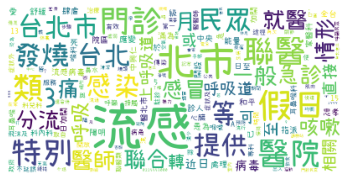

<Figure size 1200x600 with 0 Axes>

In [173]:
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(6,3), dpi = 200)
plt.show()

In [25]:
#安裝情緒分析套件
pip install snownlp

     |████████████████████████████████| 37.6MB 1.2MB/s 
  Created wheel for snownlp: filename=snownlp-0.12.3-cp36-none-any.whl size=37760958 sha256=e5afd9f7c3a8940d89aa58503be0aed64009b3d0f2014c4c767fc024964dfb16
  Stored in directory: /root/.cache/pip/wheels/f3/81/25/7c197493bd7daf177016f1a951c5c3a53b1c7e9339fd11ec8f
Successfully built snownlp


In [174]:
#參考文獻 https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/661104/
from snownlp import SnowNLP
#text = u"曾肆虐美國，今入侵台灣 腸病毒D68型恐形成嚴重呼吸道感染與肢體麻痺"
text = d
s = SnowNLP(text)


In [155]:
#劃分句子 計算分數
total1 = 0
total2 = 0

for sentence in s.sentences:
  print(sentence)
  print(SnowNLP(sentence).sentiments)
  count = SnowNLP(sentence).sentiments
  if count > 0.5:
    total1 = total1 + 1;
  else:
    total2 = total2 + 1;

print("正向",total1)
print("負向",total2)


近日流感病毒肆虐全台已15死醫院急診人滿為患為舒緩急診處理能量中央指派台北市聯合醫院為A級流感應變醫院聯醫再加開假日類流感特別門診提供民眾分流就醫
5.5370665557052945e-06
北市聯醫於3月5日至3月13日加開假日類流感特別門診提供民眾分流就醫北市聯醫忠孝中興仁愛和平陽明等院區開設假日類流感特別門診提供家醫科感染科內科 耳鼻喉科心臟科兒科等專科醫師駐診服務有效第一時間治療病患
7.950712250792691e-07
北市聯醫類流感門診假日特別開放情形取自台北市政府
0.02928173012620594
為使感染流感的民眾不延誤就醫醫師呼籲一般感冒與流感傳染途徑皆為飛沫及接觸感染但一般感冒為喉嚨痛咳嗽流鼻水等上呼吸道症狀及發燒情形
0.9636269608223718
流感除上呼吸道症狀外還會伴隨3至4天高燒頭痛肌肉關節痠痛全身倦怠虛弱無力發燒不退恐為流感因快速就醫
0.14700662258796016
醫師再次呼籲民眾預防流感記牢7步驟維持手部清潔咳嗽戴口罩生病時在家休養流行期間減少出入公共場所保持室內空氣流通均衡飲食適當運動及休息
0.985878498709843
北市聯醫假日類流感門診民眾可直接至急診發燒篩檢站現場掛號若有相關疑問或需要了解相關資訊可直接撥打市民當家熱線1999轉888或電洽台北市立聯合醫院0225553000轉9客服中心
0.8565029038075641
正向 3
負向 4
